In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.manifold import TSNE

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
csv_path = "/Users/ecem/Desktop/csv of scgs"
wavelet_csv = "/Users/ecem/Desktop/wavelet-csv"

In [3]:
signal_proc = pd.read_csv(csv_path + '/signal_processing.csv', index_col = 0)
y = signal_proc.disease
labels = np.array(y)

## spectogram:

In [4]:
spec = pd.read_csv(csv_path + '/p-value-selected-intersection-spec.csv', index_col = 0)
#spec  #uncomment to see dataframe

features_spec = np.array(spec)


In [5]:
labels_num = []
for i in range(len(labels)):
    if labels[i] == 'MR':
        labels_num.append(0)
    elif labels[i] == 'AR':
        labels_num.append(1)
    elif labels[i] == 'MS':
        labels_num.append(2)
    elif labels[i] == 'AS':
        labels_num.append(3)

In [6]:
print(len(labels_num))

1462


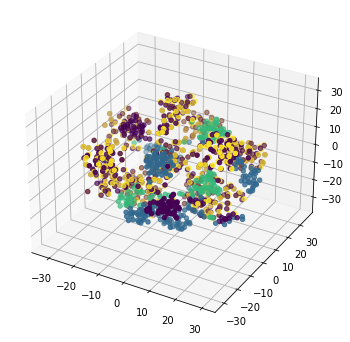

In [7]:
standard_spec = preprocessing.scale(features_spec)   

X_train, X_test, y_train, y_test = train_test_split(standard_spec, labels_num, test_size=0.33, random_state=0)


fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_spec)
ax= fig.add_subplot(111, projection='3d')
ax.scatter3D(X_tsne[:,0], X_tsne[:,1] ,X_tsne[:,2], c=labels_num)
plt.show()


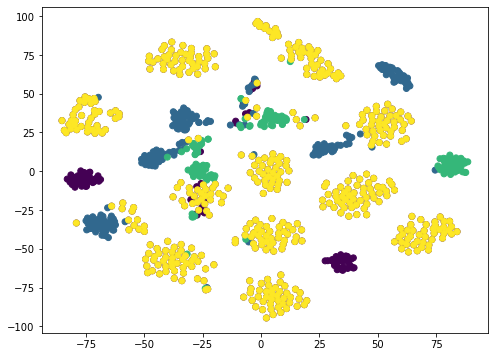

In [8]:

fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_spec)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_num  )
plt.show()


In [9]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, random_state=0, perplexity=10)
projections = tsne.fit_transform(features_spec)

fig = px.scatter(
    projections, x=0, y=1, color= signal_proc.disease)
fig.show()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [10]:
from sklearn.manifold import TSNE
import plotly.express as px


tsne = TSNE(n_components=3, random_state=0, perplexity=10)
projections = tsne.fit_transform(features_spec)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,color =signal_proc.disease)
fig.update_traces(marker_size=8)
fig.show()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



### zero crossing rate

In [11]:
zero_crossing = signal_proc.iloc[:,:21]
#zero_crossing #uncomment to see dataframe

In [12]:
features_zcr = np.array(zero_crossing)

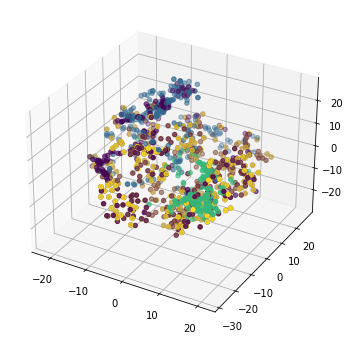

In [13]:
standard_zcr = preprocessing.scale(features_zcr )   

X_train, X_test, y_train, y_test = train_test_split(standard_zcr, labels_num, test_size=0.33, random_state=0)


fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_zcr)
ax= fig.add_subplot(111, projection='3d')
ax.scatter3D(X_tsne[:,0], X_tsne[:,1] ,X_tsne[:,2], c=labels_num)
plt.show()

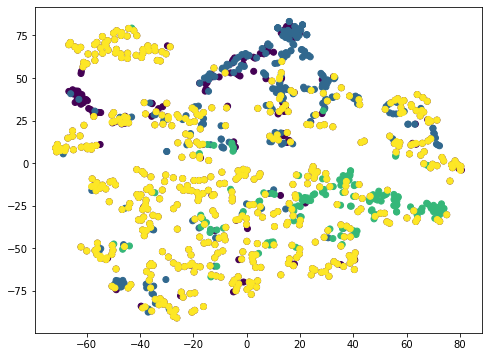

In [14]:
fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_zcr)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_num  )
plt.show()

In [15]:
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
projections = tsne.fit_transform(features_zcr)

fig = px.scatter(
    projections, x=0, y=1, color= signal_proc.disease)
fig.show()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [16]:
tsne = TSNE(n_components=3, random_state=0, perplexity=10)
projections = tsne.fit_transform(features_zcr)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,color =signal_proc.disease)
fig.update_traces(marker_size=8)
fig.show()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



### tempogram

In [17]:
tempogram = pd.read_csv(csv_path + '/p-value-selected-tempogram.csv', index_col = 0)
#tempogram #uncomment to see dataframe

In [18]:
features_temp = np.array(tempogram)
standard_temp = preprocessing.scale(features_temp)   

X_train, X_test, y_train, y_test = train_test_split(standard_temp, labels_num, test_size=0.33, random_state=0)

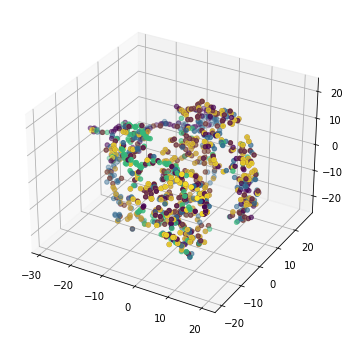

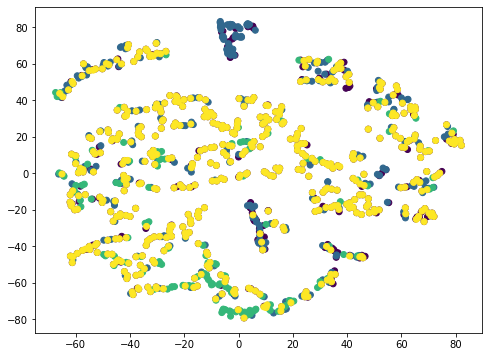

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [19]:
fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_temp)
ax= fig.add_subplot(111, projection='3d')
ax.scatter3D(X_tsne[:,0], X_tsne[:,1] ,X_tsne[:,2], c=labels_num)
plt.show()

fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_temp)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_num  )
plt.show()

tsne = TSNE(n_components=2, random_state=0, perplexity=10)
projections = tsne.fit_transform(features_temp)

fig = px.scatter(
    projections, x=0, y=1, color= signal_proc.disease)
fig.show()


tsne = TSNE(n_components=3, random_state=0, perplexity=10)
projections = tsne.fit_transform(features_temp)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,color =signal_proc.disease)
fig.update_traces(marker_size=8)
fig.show()

### chromogram

In [20]:
chromogram = pd.read_csv(csv_path + '/p-value-selected-chromogram.csv', index_col = 0)
#chromogram #uncomment to see dataframe

In [21]:
features_chro = np.array(chromogram)
standard_chro = preprocessing.scale(features_chro)   

X_train, X_test, y_train, y_test = train_test_split(standard_chro, labels_num, test_size=0.33, random_state=0)

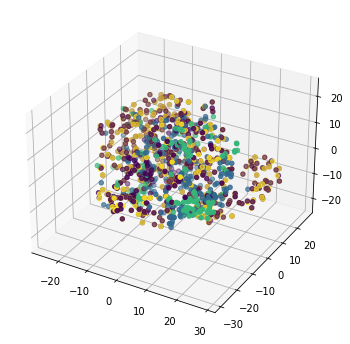

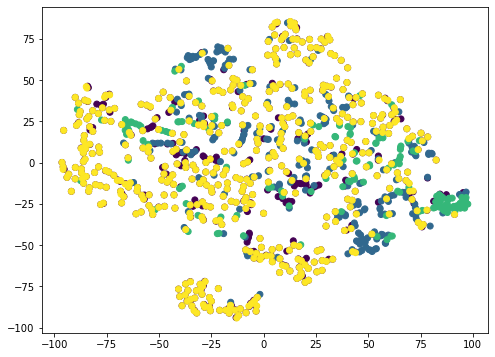

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [22]:
X_train, X_test, y_train, y_test = train_test_split(standard_chro, labels_num, test_size=0.33, random_state=0)


fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_chro)
ax= fig.add_subplot(111, projection='3d')
ax.scatter3D(X_tsne[:,0], X_tsne[:,1] ,X_tsne[:,2], c=labels_num)
plt.show()

fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_chro)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_num  )
plt.show()

tsne = TSNE(n_components=2, random_state=0, perplexity=10)
projections = tsne.fit_transform(features_chro)

fig = px.scatter(
    projections, x=0, y=1, color= signal_proc.disease)
fig.show()


tsne = TSNE(n_components=3, random_state=0, perplexity=10)
projections = tsne.fit_transform(features_chro)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,color =signal_proc.disease)
fig.update_traces(marker_size=8)
fig.show()

### wavelet level 0

In [23]:
w_lvl0 = pd.read_csv(wavelet_csv + '/wavelet_lvl0.csv', index_col = 0)
disease = w_lvl0.disease
w_lvl0 = w_lvl0.drop(['disease'], axis =1)

In [24]:
features_wave = np.array(w_lvl0)
standard_wave = preprocessing.scale(features_wave)   

X_train, X_test, y_train, y_test = train_test_split(standard_wave, labels_num, test_size=0.33, random_state=0)

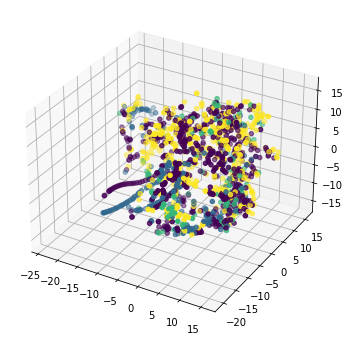

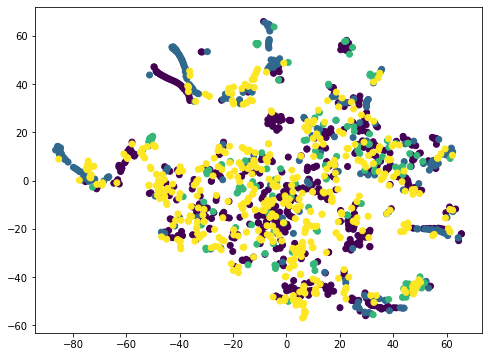

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [25]:
X_train, X_test, y_train, y_test = train_test_split(standard_wave, labels_num, test_size=0.33, random_state=0)


fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_wave)
ax= fig.add_subplot(111, projection='3d')
ax.scatter3D(X_tsne[:,0], X_tsne[:,1] ,X_tsne[:,2], c=labels_num)
plt.show()

fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_wave)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_num  )
plt.show()

tsne = TSNE(n_components=2, random_state=0, perplexity=10)
projections = tsne.fit_transform(features_wave)

fig = px.scatter(
    projections, x=0, y=1, color= signal_proc.disease)
fig.show()


tsne = TSNE(n_components=3, random_state=0, perplexity=10)
projections = tsne.fit_transform(features_wave)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,color =signal_proc.disease)
fig.update_traces(marker_size=8)
fig.show()

### for all features

In [31]:
features = pd.concat([spec, w_lvl0], axis = 1)
features = pd.concat([features, zero_crossing], axis = 1)
features = pd.concat([features, chromogram], axis = 1)
features = pd.concat([features, tempogram], axis = 1)
features = pd.concat([features, disease], axis = 1)

features = features.drop(['disease'], axis = 1)

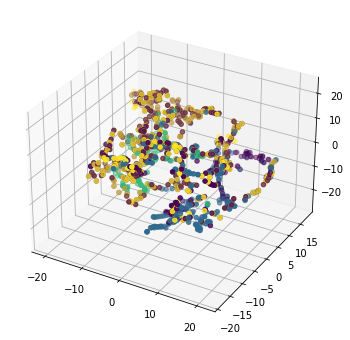

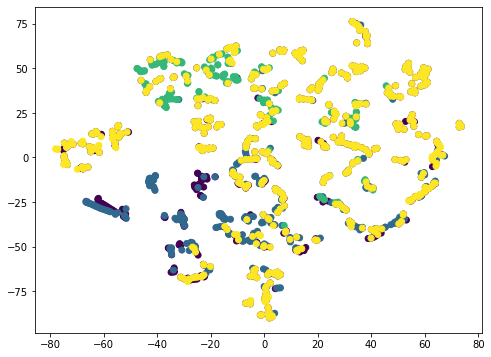

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, labels_num, test_size=0.33, random_state=0)


fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=10).fit_transform(features)
ax= fig.add_subplot(111, projection='3d')
ax.scatter3D(X_tsne[:,0], X_tsne[:,1] ,X_tsne[:,2], c=labels_num)
plt.show()

fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(features)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_num  )
plt.show()

tsne = TSNE(n_components=2, random_state=0, perplexity=10)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1, color= signal_proc.disease)
fig.show()


tsne = TSNE(n_components=3, random_state=0, perplexity=10)
projections = tsne.fit_transform(features)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,color =signal_proc.disease)
fig.update_traces(marker_size=8)
fig.show()